Here we can see an example of using SphericalVoronoi from scipy:

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi, geometric_slerp
from mpl_toolkits.mplot3d import proj3d

Setting the data, here we use cartesian coordinates

In [7]:
# set input data
data = np.array([[0, 0, 1], [0, 0, -1], [1, 0, 0],
                 [0, 1, 0], [0, -1, 0], [-1, 0, 0]])

# Calculate the maximum distance from the origin to any generator point
radius = np.max(np.linalg.norm(data, axis=1))

# Create a Spherical Voronoi diagram with the calculated radius
sv = SphericalVoronoi(data, radius)

The Voronoi data is now in sv, and we can extract it and assign it somewhere:

In [8]:
# Assign the nodes
node_x = sv.vertices[:, 0]
node_y = sv.vertices[:, 1]
node_z = sv.vertices[:, 2]

# Assign the face centers from the orginal data
face_x = data[:, 0]
face_y = data[:, 1]
face_z = data[:, 2]

If we want to visualize this to make sure everything looks right we can do that:

In [ ]:
sv.sort_vertices_of_regions()
vals = np.linspace(0, 1, 2000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b')
ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')

for region in sv.regions:
   n = len(region)
   for i in range(n):
       start = sv.vertices[region][i]
       end = sv.vertices[region][(i + 1) % n]
       result = geometric_slerp(start, end, vals)
       ax.plot(result[..., 0], result[..., 1], result[..., 2], c='k')

fig.set_size_inches(4, 4)
plt.show()

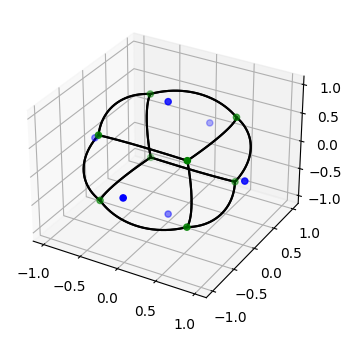

At first glance it might look like the centers are outside the sphere, but they are correct, the lines run along the edges of the sphere, the surface of the sphere extends to those points.